In [1]:
import numpy as np
import scipy.io
import os
import cv2
import math
import matplotlib.pyplot as plt
import sklearn
import h5py
from scipy.io import loadmat
# import data_preprocessing

In [4]:
# mat = scipy.io.loadmat('/DATA/TBI/jesseDATA/DoD001/DoD001_Ter001_RC1_Displacement_Normalized_3.mat')
# mat.keys()
# # mat.values()
# x = mat.items()
# print(x)
# print(mat['displacementNorm'])

In [5]:
# patient_1 = process_one_patient("/DATA/TBI/jesseDATA/DoD001", 256, 256, 1)
# print(patient_1[0])
# print(patient_1[1])
# print(patient_1[2])
# print(patient_1[3])
# type(patient_1)
# len(patient_1)
# type(patient_1[0])
# len(patient_1[0])
# type(patient_1[0][0])
# len(patient_1[0][0])
# print(patient_1[0][0])
# print(patient_1[0][0][0])
# frame_list = []
# for i in range(0, 29):
#     frame_list.append(np.average(patient_1[0][i]))
#     print(frame_list)
# max(frame_list)
# frame_list.index(1.1102230246251565e-16)
# np.argmax(frame_list)

In [60]:
def find_max_displacement(filepath, cardiac_cycle=5):
    rawData = loadmat(filepath)
    displacement = np.array(list(rawData['displacementNorm']))
    
    # displacementNorm has shape (x_dim, y_dim, 30, n_cycles)
    disShape = displacement.shape
    print(disShape)
    
    displace_data = np.zeros([disShape[0],disShape[1], disShape[2]])
    # print(displace_data.shape)
    
    displace_data[:,:] = displacement[:, :, :, cardiac_cycle]
    displace_data = np.array(displace_data.astype('float64'))
    
    disp_avg_list = []
    for i in range(0, 29):
        disp_avg_list.append(np.average(displace_data[:, :, i]))
    # print(disp_avg_list)
    
#     print("max displacement averaged:")
#     print(max(disp_avg_list)) # disp_avg_list.index()
    print("max displacement frame:")
    print(np.argmax(disp_avg_list))
    
    plt.plot(disp_avg_list)

(259, 80, 30, 9)
max displacement frame:
26


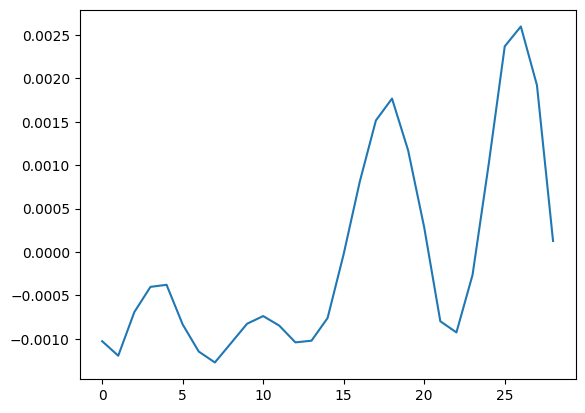

In [62]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter001_RC1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement frame:
28


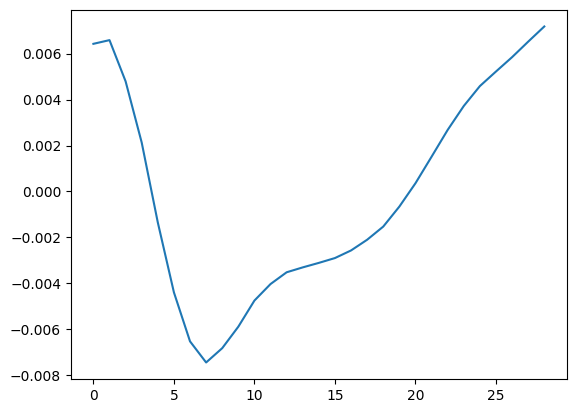

In [55]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter002_RA1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement frame:
28


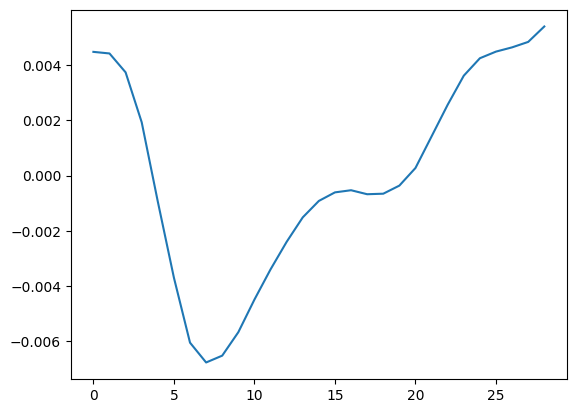

In [56]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter003_RO1_Displacement_Normalized_3.mat")

(259, 80, 30, 8)
max displacement frame:
28


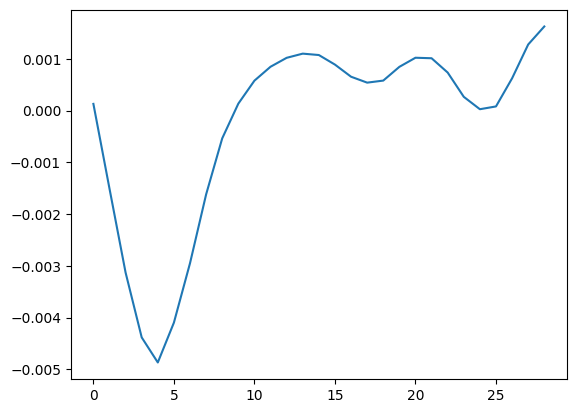

In [57]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter017_LC1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement frame:
28


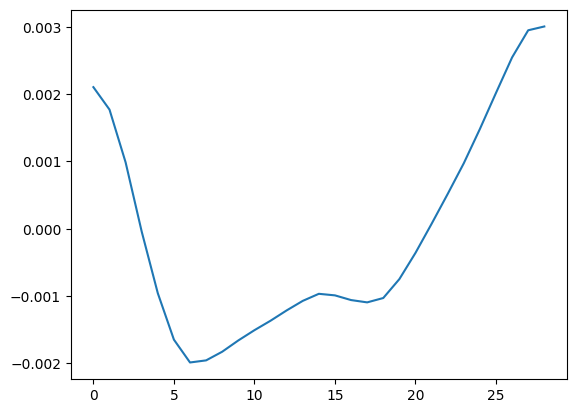

In [58]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter016_LA1_Displacement_Normalized_3.mat")

(259, 80, 30, 10)
max displacement frame:
3


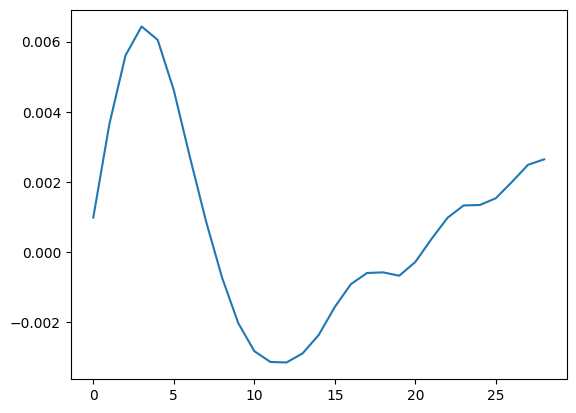

In [59]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter018_LO1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement frame:
0


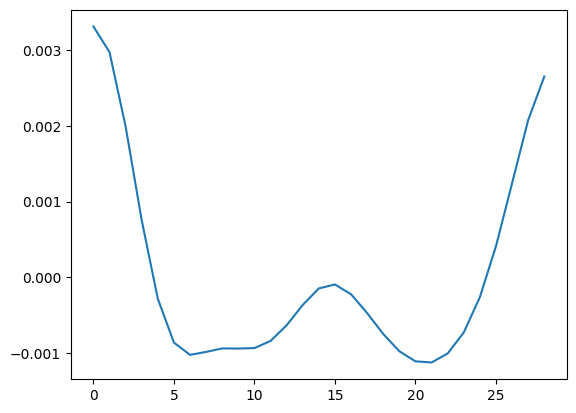

In [9]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter003_RC1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement frame:
9


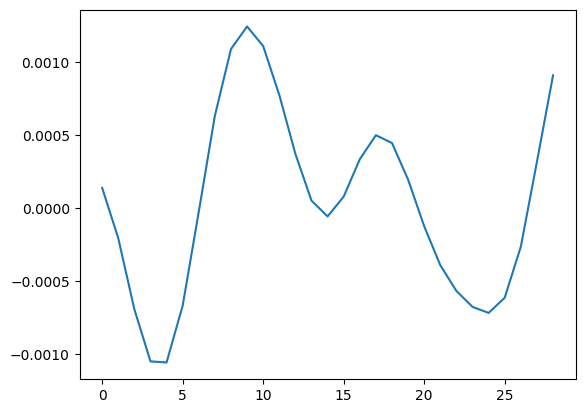

In [10]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter002_RA1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement frame:
28


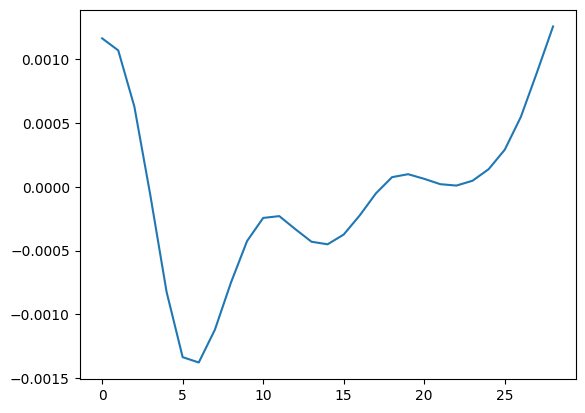

In [11]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter001_RO1_Displacement_Normalized_3.mat")

(259, 80, 30, 6)
max displacement frame:
25


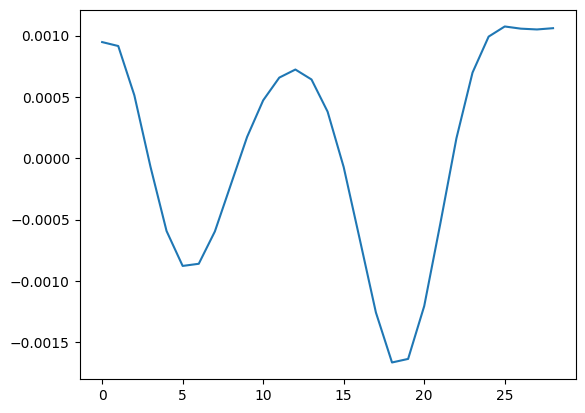

In [12]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter017_LC1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement frame:
4


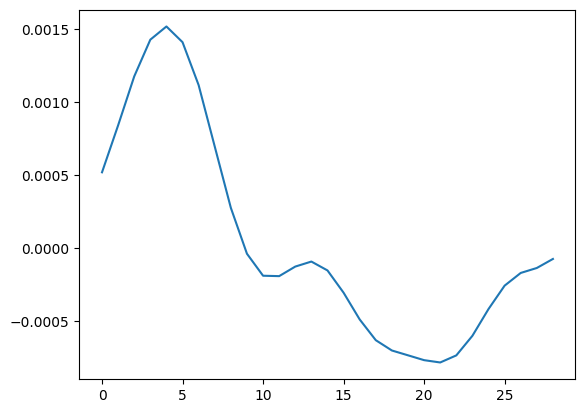

In [13]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter019_LA2_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement frame:
1


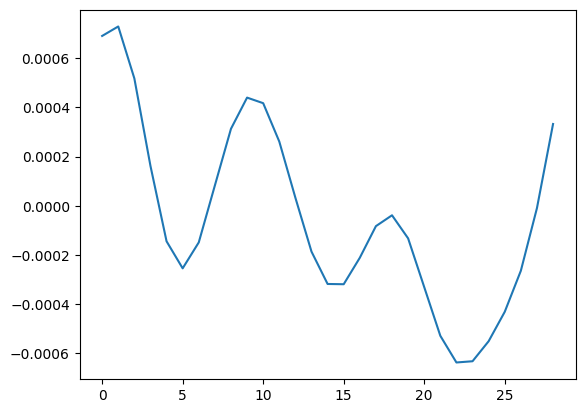

In [14]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter018_LO1_Displacement_Normalized_3.mat")

(259, 79, 30, 6)
max displacement frame:
0


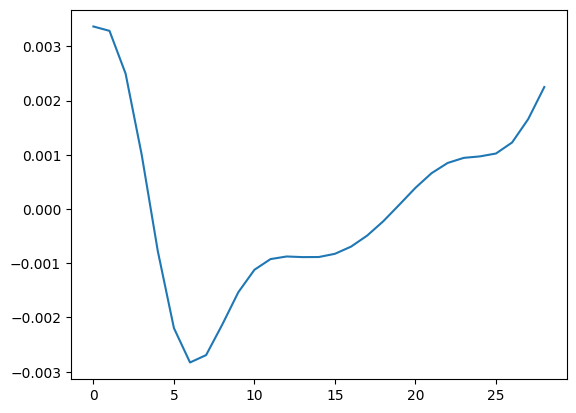

In [41]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD050/DoD050_Ter001_RC1_Displacement_Normalized_3.mat")

(259, 79, 30, 3)
max displacement frame:
0


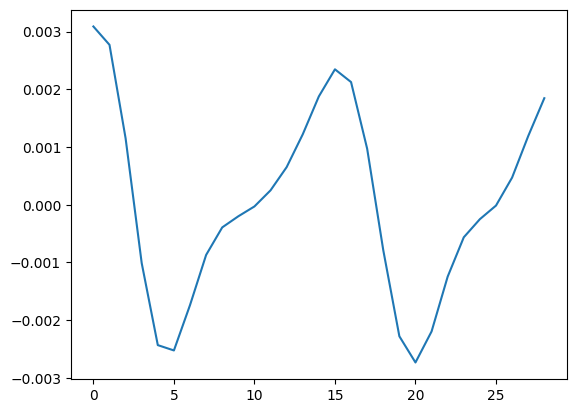

In [42]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD050/DoD050_Ter003_RA1_Displacement_Normalized_3.mat")

(259, 79, 30, 7)
max displacement frame:
28


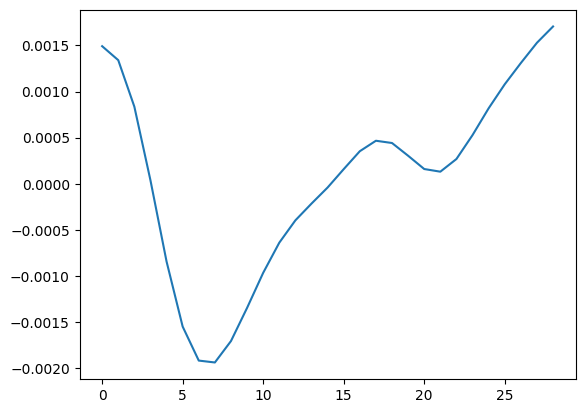

In [43]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD050/DoD050_Ter002_RO1_Displacement_Normalized_3.mat")

(259, 80, 30, 5)
max displacement frame:
1


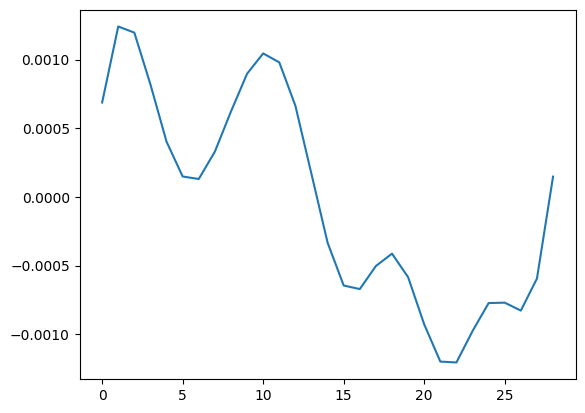

In [44]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD050/DoD050_Ter016_LC1_Displacement_Normalized_3.mat")

(259, 79, 30, 7)
max displacement frame:
22


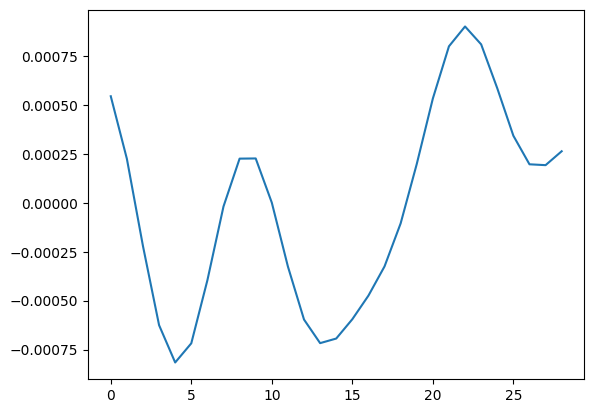

In [45]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD050/DoD050_Ter018_LA1_Displacement_Normalized_3.mat")

(259, 79, 30, 7)
max displacement frame:
6


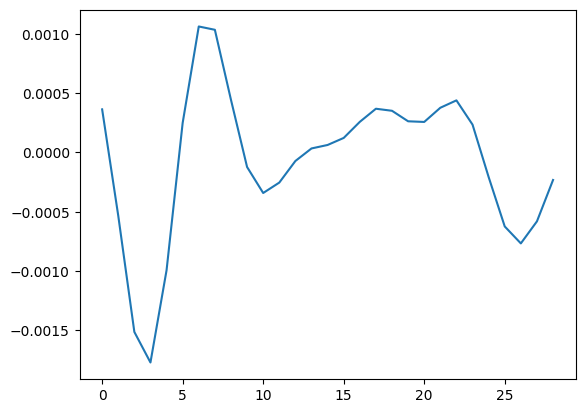

In [46]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD050/DoD050_Ter017_LO1_Displacement_Normalized_3.mat")

In [28]:
def find_max_displacement_quadrants(filepath, cardiac_cycle=0):
    rawData = loadmat(filepath)
    displacement = np.array(list(rawData['displacementNorm']))
    
    # displacementNorm has shape (x_dim, y_dim, 30, n_cycles)
    disShape = displacement.shape
    print(disShape)
    
    displace_data = np.zeros([disShape[0],disShape[1], disShape[2]])
    # print(displace_data.shape)
    
    displace_data[:,:] = displacement[:, :, :, cardiac_cycle]
    displace_data = np.array(displace_data.astype('float64'))
    
    disp_avg_first = []
    disp_avg_second = []
    disp_avg_third = []
    disp_avg_fourth = []
    for i in range(0, 29):
        disp_avg_first.append(np.average(displace_data[0:129, 0:40, i]))
        disp_avg_second.append(np.average(displace_data[0:129, 41:79, i]))
        disp_avg_third.append(np.average(displace_data[130:249, 0:40, i]))
        disp_avg_fourth.append(np.average(displace_data[130:249, 41:79, i]))
    
#     print("max displacement averaged first quadrant:")
#     print(max(disp_avg_first))
    print("max displacement frame first quadrant (top left of image):")
    print(np.argmax(disp_avg_first))
        
#     print("max displacement averaged second quadrant:")
#     print(max(disp_avg_second))
    print("max displacement frame second quadrant (top right of image):")
    print(np.argmax(disp_avg_second))
    
#     print("max displacement averaged third quadrant:")
#     print(max(disp_avg_third))
    print("max displacement frame third quadrant (bottom left of image):")
    print(np.argmax(disp_avg_third))
    
#     print("max displacement averaged fourth quadrant:")
#     print(max(disp_avg_fourth))
    print("max displacement frame fourth quadrant (bottom right of image):")
    print(np.argmax(disp_avg_fourth))

In [29]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter001_RC1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement frame first quadrant (top left of image):
27
max displacement frame second quadrant (top right of image):
26
max displacement frame third quadrant (bottom left of image):
3
max displacement frame fourth quadrant (bottom right of image):
18


In [30]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter002_RA1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement frame first quadrant (top left of image):
2
max displacement frame second quadrant (top right of image):
4
max displacement frame third quadrant (bottom left of image):
0
max displacement frame fourth quadrant (bottom right of image):
28


In [31]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter003_RO1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement frame first quadrant (top left of image):
4
max displacement frame second quadrant (top right of image):
2
max displacement frame third quadrant (bottom left of image):
0
max displacement frame fourth quadrant (bottom right of image):
24


In [32]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter017_LC1_Displacement_Normalized_3.mat")

(259, 80, 30, 8)
max displacement frame first quadrant (top left of image):
27
max displacement frame second quadrant (top right of image):
25
max displacement frame third quadrant (bottom left of image):
10
max displacement frame fourth quadrant (bottom right of image):
14


In [33]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter016_LA1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement frame first quadrant (top left of image):
23
max displacement frame second quadrant (top right of image):
2
max displacement frame third quadrant (bottom left of image):
28
max displacement frame fourth quadrant (bottom right of image):
16


In [34]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter018_LO1_Displacement_Normalized_3.mat")

(259, 80, 30, 10)
max displacement frame first quadrant (top left of image):
0
max displacement frame second quadrant (top right of image):
0
max displacement frame third quadrant (bottom left of image):
10
max displacement frame fourth quadrant (bottom right of image):
14


In [35]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter003_RC1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement frame first quadrant (top left of image):
0
max displacement frame second quadrant (top right of image):
0
max displacement frame third quadrant (bottom left of image):
7
max displacement frame fourth quadrant (bottom right of image):
0


In [36]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter002_RA1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement frame first quadrant (top left of image):
28
max displacement frame second quadrant (top right of image):
28
max displacement frame third quadrant (bottom left of image):
8
max displacement frame fourth quadrant (bottom right of image):
7


In [37]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter001_RO1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement frame first quadrant (top left of image):
1
max displacement frame second quadrant (top right of image):
28
max displacement frame third quadrant (bottom left of image):
8
max displacement frame fourth quadrant (bottom right of image):
0


In [38]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter017_LC1_Displacement_Normalized_3.mat")

(259, 80, 30, 6)
max displacement frame first quadrant (top left of image):
28
max displacement frame second quadrant (top right of image):
28
max displacement frame third quadrant (bottom left of image):
9
max displacement frame fourth quadrant (bottom right of image):
0


In [39]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter019_LA2_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement frame first quadrant (top left of image):
24
max displacement frame second quadrant (top right of image):
23
max displacement frame third quadrant (bottom left of image):
4
max displacement frame fourth quadrant (bottom right of image):
4


In [40]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD008/DoD008_Ter018_LO1_Displacement_Normalized_3.mat")

(259, 80, 30, 7)
max displacement frame first quadrant (top left of image):
18
max displacement frame second quadrant (top right of image):
0
max displacement frame third quadrant (bottom left of image):
9
max displacement frame fourth quadrant (bottom right of image):
0


In [47]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD050/DoD050_Ter001_RC1_Displacement_Normalized_3.mat")

(259, 79, 30, 6)
max displacement frame first quadrant (top left of image):
1
max displacement frame second quadrant (top right of image):
1
max displacement frame third quadrant (bottom left of image):
8
max displacement frame fourth quadrant (bottom right of image):
0


In [48]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD050/DoD050_Ter003_RA1_Displacement_Normalized_3.mat")

(259, 79, 30, 3)
max displacement frame first quadrant (top left of image):
1
max displacement frame second quadrant (top right of image):
0
max displacement frame third quadrant (bottom left of image):
1
max displacement frame fourth quadrant (bottom right of image):
20


In [49]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD050/DoD050_Ter002_RO1_Displacement_Normalized_3.mat")

(259, 79, 30, 7)
max displacement frame first quadrant (top left of image):
1
max displacement frame second quadrant (top right of image):
28
max displacement frame third quadrant (bottom left of image):
7
max displacement frame fourth quadrant (bottom right of image):
8


In [50]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD050/DoD050_Ter016_LC1_Displacement_Normalized_3.mat")

(259, 80, 30, 5)
max displacement frame first quadrant (top left of image):
26
max displacement frame second quadrant (top right of image):
26
max displacement frame third quadrant (bottom left of image):
2
max displacement frame fourth quadrant (bottom right of image):
2


In [51]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD050/DoD050_Ter018_LA1_Displacement_Normalized_3.mat")

(259, 79, 30, 7)
max displacement frame first quadrant (top left of image):
2
max displacement frame second quadrant (top right of image):
0
max displacement frame third quadrant (bottom left of image):
9
max displacement frame fourth quadrant (bottom right of image):
7


In [52]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD050/DoD050_Ter017_LO1_Displacement_Normalized_3.mat")

(259, 79, 30, 7)
max displacement frame first quadrant (top left of image):
1
max displacement frame second quadrant (top right of image):
0
max displacement frame third quadrant (bottom left of image):
7
max displacement frame fourth quadrant (bottom right of image):
6
